In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0–255 to 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# A. Using a Multi-Layer Perceptron (MLP) classifier

## Step A1: Preprocess Data for MLP

In [2]:
# Flatten images from 28x28 to 784
x_train_flat = x_train.reshape((60000, 28*28))
x_test_flat = x_test.reshape((10000, 28*28))

# One-hot encode labels (e.g., 5 → [0 0 0 0 0 1 0 0 0 0])
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


## Step A2: Build the MLP Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

mlp_model = Sequential([
    Input(shape=(784,)),               # Input layer
    Dense(128, activation='relu'),     # Hidden layer
    Dense(64, activation='relu'),      # Hidden layer
    Dense(10, activation='softmax')    # Output layer
])


## Step A3: Compile and Train

In [4]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(x_train_flat, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8024 - loss: 0.6951 - val_accuracy: 0.9451 - val_loss: 0.1933
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9512 - loss: 0.1698 - val_accuracy: 0.9588 - val_loss: 0.1423
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1141 - val_accuracy: 0.9645 - val_loss: 0.1206
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0859 - val_accuracy: 0.9637 - val_loss: 0.1153
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0651 - val_accuracy: 0.9685 - val_loss: 0.1042


## Step A4: Evaluate MLP

In [5]:
test_loss, test_acc = mlp_model.evaluate(x_test_flat, y_test_cat)
print(f"MLP Test Accuracy: {test_acc * 100:.2f} %")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9660 - loss: 0.1062
MLP Test Accuracy: 97.03 %


# B. Using a Convolutional Neural Network (CNN) classifier 

## Step B1: Preprocess Data for CNN

In [6]:
# Reshape images to add channel dimension
x_train_cnn = x_train.reshape((60000, 28, 28, 1))
x_test_cnn = x_test.reshape((10000, 28, 28, 1))


## Step B2: Build the CNN Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Input(shape=(28, 28, 1)),                  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



## Step B3: Compile and Train

In [8]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8361 - loss: 0.5891 - val_accuracy: 0.9747 - val_loss: 0.0908
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9761 - loss: 0.0806 - val_accuracy: 0.9810 - val_loss: 0.0650
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9832 - loss: 0.0520 - val_accuracy: 0.9836 - val_loss: 0.0569
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9871 - loss: 0.0402 - val_accuracy: 0.9828 - val_loss: 0.0523
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9894 - loss: 0.0325 - val_accuracy: 0.9866 - val_loss: 0.0461


## Step B4: Evaluate CNN

In [9]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat)
print(f"CNN Test Accuracy: {test_acc_cnn * 100:.2f} %")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0455
CNN Test Accuracy: 98.81 %


# Predict and Visualize a Digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


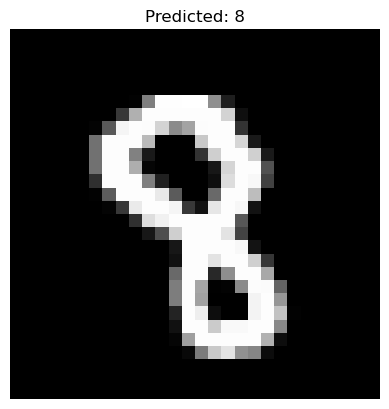

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Predict one image
image_index = 1267
img = x_test_cnn[image_index].reshape(1, 28, 28, 1)
prediction = cnn_model.predict(img)
predicted_label = np.argmax(prediction)

# Show image
plt.imshow(x_test[image_index], cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
